<a href="https://colab.research.google.com/github/utr100/statistics/blob/main/California_Housing_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.groupby(by="ocean_proximity")['median_house_value'].mean()

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

In [ ]:
housing = housing[housing['ocean_proximity'] != 'ISLAND'].reset_index(drop=True).copy()

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20428.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,-119.569999,35.632412,28.636152,2636.020208,537.899305,1425.660286,499.593700,3.870944,206813.756288
std,2.003685,2.135918,12.583924,2181.794772,421.425970,1132.530137,382.357072,1.899961,115372.499511
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

In [ ]:
df=pd.DataFrame({'<1H OCEAN':housing[housing['ocean_proximity']=='<1H OCEAN']['median_house_value'],
                 'INLAND':housing[housing['ocean_proximity']=='INLAND']['median_house_value'],
                 'NEAR OCEAN':housing[housing['ocean_proximity']=='NEAR OCEAN']['median_house_value'],
                 'NEAR BAY':housing[housing['ocean_proximity']=='NEAR BAY']['median_house_value']})

In [ ]:
df.describe()

,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY
count,9136.000000,6551.000000,2658.000000,2290.000000
mean,240084.285464,124805.392001,249433.977427,259212.311790
std,106124.292213,70007.908494,122477.145927,122818.537064
min,17500.000000,14999.000000,22500.000000,22500.000000
25%,164100.000000,77500.000000,150000.000000,162500.000000
50%,214850.000000,108500.000000,229450.000000,233800.000000
75%,289100.000000,148950.000000,322750.000000,345700.000000
max,500001.000000,500001.000000,500001.000000,500001.000000


In [ ]:
import random
import numpy as np

np.random.seed(1234)
anovaData=pd.DataFrame({'<1H OCEAN':random.sample(list(housing['median_house_value'][housing['ocean_proximity']=='<1H OCEAN']), 100),
                        'INLAND':random.sample(list(housing['median_house_value'][housing['ocean_proximity']=='INLAND']), 100),
                        'NEAR OCEAN':random.sample(list(housing['median_house_value'][housing['ocean_proximity']=='NEAR OCEAN']), 100),
                        'NEAR BAY':random.sample(list(housing['median_house_value'][housing['ocean_proximity']=='NEAR BAY']), 100)})

In [ ]:
anovaData.describe()

,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY
count,100.000000,100.00000,100.000000,100.000000
mean,211083.030000,126911.00000,248154.080000,263907.070000
std,92144.869175,69964.87704,123516.920607,126126.112549
min,54300.000000,46900.00000,58100.000000,81300.000000
25%,147650.000000,82100.00000,161800.000000,160775.000000
50%,191450.000000,103100.00000,223050.000000,244050.000000
75%,249450.000000,149650.00000,314225.000000,357050.000000
max,500001.000000,405800.00000,500001.000000,500001.000000


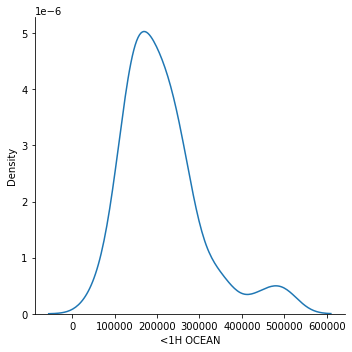

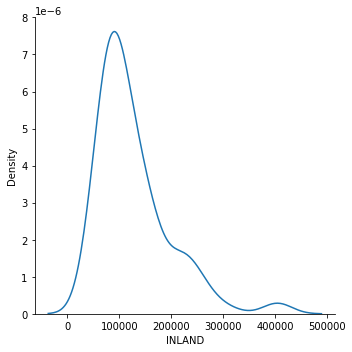

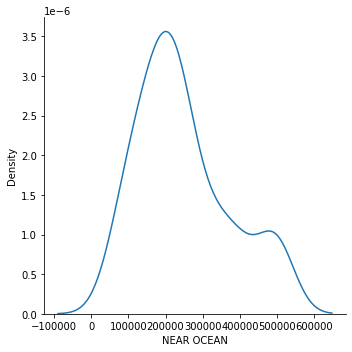

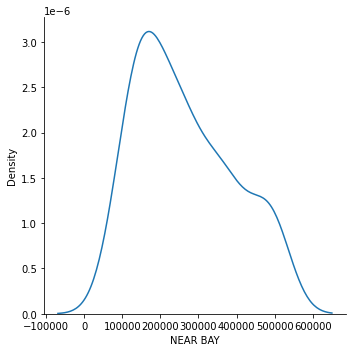

In [ ]:
import seaborn as sns

sns.displot(anovaData, x="<1H OCEAN", kind="kde")
sns.displot(anovaData, x="INLAND", kind="kde")
sns.displot(anovaData, x="NEAR OCEAN", kind="kde")
sns.displot(anovaData, x="NEAR BAY", kind="kde")

In [ ]:
import scipy.stats as stats

anovaData['<1H OCEAN'],fitted_lambda = stats.boxcox(anovaData['<1H OCEAN'])
anovaData['INLAND'],fitted_lambda = stats.boxcox(anovaData['INLAND'])
anovaData['NEAR OCEAN'],fitted_lambda = stats.boxcox(anovaData['NEAR OCEAN'])
anovaData['NEAR BAY'],fitted_lambda = stats.boxcox(anovaData['NEAR BAY'])

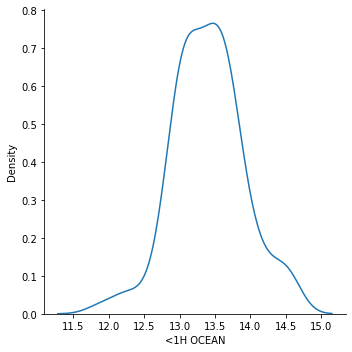

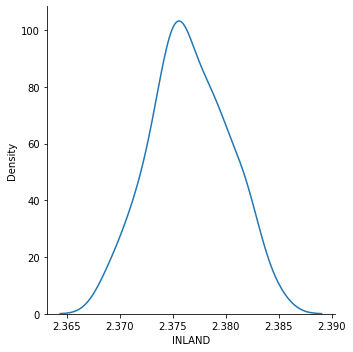

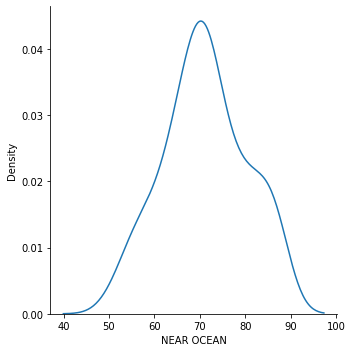

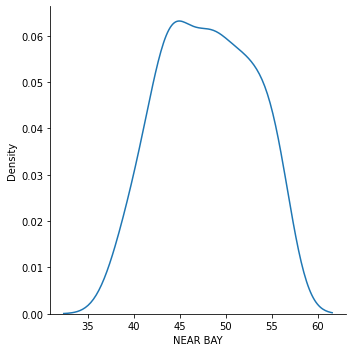

In [ ]:
sns.displot(anovaData, x="<1H OCEAN", kind="kde")
sns.displot(anovaData, x="INLAND", kind="kde")
sns.displot(anovaData, x="NEAR OCEAN", kind="kde")
sns.displot(anovaData, x="NEAR BAY", kind="kde")

In [ ]:
F, p = stats.f_oneway(anovaData['<1H OCEAN'],anovaData['NEAR OCEAN'],anovaData['NEAR BAY'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.5f' % (F, p))

F-Statistic=2384.029, p=0.00000
